In [106]:
from keras.datasets import mnist
import matplotlib.pyplot as plt
from tensorflow.keras.utils import to_categorical
from keras.utils import np_utils
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from keras.callbacks import ModelCheckpoint, EarlyStopping

import numpy as np
import sys
import os
import tensorflow as tf

In [84]:
seed = 1234
np.random.seed(seed)
tf.random.set_seed(seed)

In [85]:
(X_train, Y_class_train), (X_test, Y_class_test) = mnist.load_data()

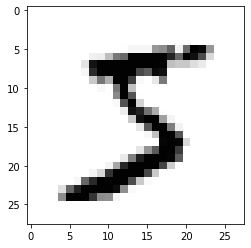

In [86]:
plt.imshow(X_train[0], cmap='Greys')
plt.show()

In [95]:
for x in X_train[0]:
    for i in x:
        print('%4d' %(i), end="")
    print('\n')

   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0

   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0

   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0

   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0

   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0

   0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136 175  26 166 255 247 127   0   0   0   0

   0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253 225 172 253 242 195  64   0   0   0   0

   0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251  93  82  82  56  39   0   0   0   0   0

   0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 182 247 241   0   0   0   0

In [96]:
X_train.shape

(60000, 28, 28)

In [63]:
X_train = X_train.reshape(len(X_train), -1) # 차원 변환
# X_train = X_train.reshape(X_train.shape[0], 784)
# X_train = X_train.reshape(X_train.shape[0], -1) # 1차원 배열로 전환
X_train = X_train.astype('float32') / 255 # normalize 0 to 1

In [ ]:
X_test = X_test.reshape(X_test.shape[0], 784).astype('float32') / 255

In [114]:
X_test.shape

(10000, 28, 28)

In [97]:
print("class : %d " %(Y_class_train[0]))

class : 5 


In [98]:
# one hot encoding
Y_train = to_categorical(Y_class_train, 10)
Y_test = to_categorical(Y_class_test, 10)

In [113]:
Y_train.shape, Y_test.shape

((60000, 10), (10000, 10))

In [99]:
Y_train2 = np_utils.to_categorical(Y_class_train) # to_categorical 뒤에 10을 넣어도 마찬가지
Y_train2[0] == Y_train[0]

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True])

In [100]:
print(Y_train[0]) # 5 확인

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [103]:
model = Sequential()
model.add(Dense(512, input_dim=784, activation='relu'))
model.add(Dense(18, activation='softmax'))

In [104]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [107]:
MODEL_DIR = './model/'
if not os.path.exists(MODEL_DIR):
    os.mkdir(MODEL_DIR)

In [108]:
model_path = '/model/{epoch:02d}-{val_loss:.4f}.hdf5'

In [109]:
checkpoint = ModelCheckpoint(filepath=model_path, monitor='val_loss', verbose=1, save_best_only=True)
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=100)

In [111]:
history = model.fit(X_train, Y_train, validation_data=(X_test, Y_test), epochs=30 , batch_size=200, verbose=0, 
                    callbacks=[early_stopping_callback, checkpoint])
print('\n Test Accuracy: % .4f' % (model.evaluation(X_test, Y_test)[1]))

ValueError: in user code:

    File "c:\users\user\appdata\local\programs\python\python39\lib\site-packages\keras\engine\training.py", line 878, in train_function  *
        return step_function(self, iterator)
    File "c:\users\user\appdata\local\programs\python\python39\lib\site-packages\keras\engine\training.py", line 867, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "c:\users\user\appdata\local\programs\python\python39\lib\site-packages\keras\engine\training.py", line 860, in run_step  **
        outputs = model.train_step(data)
    File "c:\users\user\appdata\local\programs\python\python39\lib\site-packages\keras\engine\training.py", line 808, in train_step
        y_pred = self(x, training=True)
    File "c:\users\user\appdata\local\programs\python\python39\lib\site-packages\keras\utils\traceback_utils.py", line 67, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "c:\users\user\appdata\local\programs\python\python39\lib\site-packages\keras\engine\input_spec.py", line 263, in assert_input_compatibility
        raise ValueError(f'Input {input_index} of layer "{layer_name}" is '

    ValueError: Input 0 of layer "sequential" is incompatible with the layer: expected shape=(None, 784), found shape=(200, 28, 28)


In [ ]:
model.fit(X_train, Y_train, epochs= , batch_size=)